In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import nltk
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Download NLTK resources
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [2]:
df = pd.read_csv('/content/amazon_review.csv')
df

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime,day_diff,helpful_yes,total_vote
0,A3SBTW3WS4IQSN,B007WTAJTO,NaN,"[0, 0]",No issues.,4.0,Four Stars,1406073600,2014-07-23,138,0,0
1,A18K1ODH1I2MVB,B007WTAJTO,0mie,"[0, 0]","Purchased this for my device, it worked as adv...",5.0,MOAR SPACE!!!,1382659200,2013-10-25,409,0,0
2,A2FII3I2MBMUIA,B007WTAJTO,1K3,"[0, 0]",it works as expected. I should have sprung for...,4.0,nothing to really say....,1356220800,2012-12-23,715,0,0
3,A3H99DFEG68SR,B007WTAJTO,1m2,"[0, 0]",This think has worked out great.Had a diff. br...,5.0,Great buy at this price!!! *** UPDATE,1384992000,2013-11-21,382,0,0
4,A375ZM4U047O79,B007WTAJTO,2&amp;1/2Men,"[0, 0]","Bought it with Retail Packaging, arrived legit...",5.0,best deal around,1373673600,2013-07-13,513,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
4910,A2LBMKXRM5H2W9,B007WTAJTO,"ZM ""J""","[0, 0]",I bought this Sandisk 16GB Class 10 to use wit...,1.0,Do not waste your money.,1374537600,2013-07-23,503,0,0
4911,ALGDLRUI1ZPCS,B007WTAJTO,Zo,"[0, 0]",Used this for extending the capabilities of my...,5.0,Great item!,1377129600,2013-08-22,473,0,0
4912,A2MR1NI0ENW2AD,B007WTAJTO,Z S Liske,"[0, 0]",Great card that is very fast and reliable. It ...,5.0,Fast and reliable memory card,1396224000,2014-03-31,252,0,0
4913,A37E6P3DSO9QJD,B007WTAJTO,Z Taylor,"[0, 0]",Good amount of space for the stuff I want to d...,5.0,Great little card,1379289600,2013-09-16,448,0,0


In [3]:
df.head(10)

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime,day_diff,helpful_yes,total_vote
0,A3SBTW3WS4IQSN,B007WTAJTO,NaN,"[0, 0]",No issues.,4.0,Four Stars,1406073600,2014-07-23,138,0,0
1,A18K1ODH1I2MVB,B007WTAJTO,0mie,"[0, 0]","Purchased this for my device, it worked as adv...",5.0,MOAR SPACE!!!,1382659200,2013-10-25,409,0,0
2,A2FII3I2MBMUIA,B007WTAJTO,1K3,"[0, 0]",it works as expected. I should have sprung for...,4.0,nothing to really say....,1356220800,2012-12-23,715,0,0
3,A3H99DFEG68SR,B007WTAJTO,1m2,"[0, 0]",This think has worked out great.Had a diff. br...,5.0,Great buy at this price!!! *** UPDATE,1384992000,2013-11-21,382,0,0
4,A375ZM4U047O79,B007WTAJTO,2&amp;1/2Men,"[0, 0]","Bought it with Retail Packaging, arrived legit...",5.0,best deal around,1373673600,2013-07-13,513,0,0
5,A2IDCSC6NVONIZ,B007WTAJTO,2Cents!,"[0, 0]",It's mini storage. It doesn't do anything els...,5.0,Not a lot to really be said,1367193600,2013-04-29,588,0,0
6,A26YHXZD5UFPVQ,B007WTAJTO,2K1Toaster,"[0, 0]",I have it in my phone and it never skips a bea...,5.0,Works well,1382140800,2013-10-19,415,0,0
7,A3CW0ZLUO5X2B1,B007WTAJTO,"35-year Technology Consumer ""8-tracks to 802.11""","[0, 0]",It's hard to believe how affordable digital ha...,5.0,32 GB for less than two sawbucks...what's not ...,1404950400,2014-10-07,62,0,0
8,A2CYJO155QP33S,B007WTAJTO,4evryoung,"[1, 1]",Works in a HTC Rezound. Was running short of ...,5.0,Loads of room,1395619200,2014-03-24,259,1,1
9,A2S7XG3ZC4VGOQ,B007WTAJTO,53rdcard,"[0, 0]","in my galaxy s4, super fast card, and am total...",5.0,works great,1381449600,2013-11-10,393,0,0


In [4]:
# Data Type Information
print("Data Types:")
print(df.dtypes)

Data Types:
reviewerID         object
asin               object
reviewerName       object
helpful            object
reviewText         object
overall           float64
summary            object
unixReviewTime      int64
reviewTime         object
day_diff            int64
helpful_yes         int64
total_vote          int64
dtype: object


In [5]:
total=len(df)
for col in df.columns:
  print(f"{col} has {df[col].nunique()}/{total} unique values\n -------------------------")

reviewerID has 4915/4915 unique values
 -------------------------
asin has 1/4915 unique values
 -------------------------
reviewerName has 4594/4915 unique values
 -------------------------
helpful has 42/4915 unique values
 -------------------------
reviewText has 4912/4915 unique values
 -------------------------
overall has 5/4915 unique values
 -------------------------
summary has 3885/4915 unique values
 -------------------------
unixReviewTime has 690/4915 unique values
 -------------------------
reviewTime has 690/4915 unique values
 -------------------------
day_diff has 690/4915 unique values
 -------------------------
helpful_yes has 23/4915 unique values
 -------------------------
total_vote has 26/4915 unique values
 -------------------------


In [6]:
print("Dataset Info:")
print(df.info())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4915 entries, 0 to 4914
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   reviewerID      4915 non-null   object 
 1   asin            4915 non-null   object 
 2   reviewerName    4914 non-null   object 
 3   helpful         4915 non-null   object 
 4   reviewText      4914 non-null   object 
 5   overall         4915 non-null   float64
 6   summary         4915 non-null   object 
 7   unixReviewTime  4915 non-null   int64  
 8   reviewTime      4915 non-null   object 
 9   day_diff        4915 non-null   int64  
 10  helpful_yes     4915 non-null   int64  
 11  total_vote      4915 non-null   int64  
dtypes: float64(1), int64(4), object(7)
memory usage: 460.9+ KB
None


In [7]:
# Summary Statistics
print("Summary Statistics:")
df.describe()

Summary Statistics:


,overall,unixReviewTime,day_diff,helpful_yes,total_vote
count,4915.000000,4.915000e+03,4915.000000,4915.000000,4915.000000
mean,4.587589,1.379465e+09,437.367040,1.311089,1.521465
std,0.996845,1.581857e+07,209.439871,41.619161,44.123095
min,1.000000,1.339200e+09,1.000000,0.000000,0.000000
25%,5.000000,1.365898e+09,281.000000,0.000000,0.000000
50%,5.000000,1.381277e+09,431.000000,0.000000,0.000000
75%,5.000000,1.392163e+09,601.000000,0.000000,0.000000
max,5.000000,1.406074e+09,1064.000000,1952.000000,2020.000000


In [8]:
print("Null Values Check:")
print(df.isnull().sum())

Null Values Check:
reviewerID        0
asin              0
reviewerName      1
helpful           0
reviewText        1
overall           0
summary           0
unixReviewTime    0
reviewTime        0
day_diff          0
helpful_yes       0
total_vote        0
dtype: int64


In [9]:
df = df.dropna()
print("Null values removed if any were detected.")

Null values removed if any were detected.


In [10]:
print(df.isnull().sum())

reviewerID        0
asin              0
reviewerName      0
helpful           0
reviewText        0
overall           0
summary           0
unixReviewTime    0
reviewTime        0
day_diff          0
helpful_yes       0
total_vote        0
dtype: int64


In [11]:
reviews = df['reviewText'].astype(str)  # Convert to string to avoid NaN issues
ratings = df['overall']

In [12]:
# Map ratings to sentiment labels
def label_sentiment(rating):
    if rating >= 4:
        return 'positive'
    elif rating <= 2:
        return 'negative'
    else:
        return 'neutral'

In [13]:
df['sentiment'] = ratings.apply(label_sentiment)
print("\nSentiment Distribution:")
print(df['sentiment'].value_counts())


Sentiment Distribution:
sentiment
positive    4447
negative     324
neutral      142
Name: count, dtype: int64


<ipython-input-13-e74b02030896>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentiment'] = ratings.apply(label_sentiment)


In [14]:
ex=df['reviewText'][10]
ex

'I like this SD Card because it can take music video downloads, personal videos, files,docs, and multimedia images with a fast transfer rate of Class 10 speed. It can take games with large files very easily and still have enough space for apps. It&#34;s great for video cameras and camcorders with the supplied adapter. Fits very easily into smartphones and tablets SD Card slots. I recommend this 32GB SD Card to everyone.'

In [15]:
nltk.word_tokenize(ex)

['I',
 'like',
 'this',
 'SD',
 'Card',
 'because',
 'it',
 'can',
 'take',
 'music',
 'video',
 'downloads',
 ',',
 'personal',
 'videos',
 ',',
 'files',
 ',',
 'docs',
 ',',
 'and',
 'multimedia',
 'images',
 'with',
 'a',
 'fast',
 'transfer',
 'rate',
 'of',
 'Class',
 '10',
 'speed',
 '.',
 'It',
 'can',
 'take',
 'games',
 'with',
 'large',
 'files',
 'very',
 'easily',
 'and',
 'still',
 'have',
 'enough',
 'space',
 'for',
 'apps',
 '.',
 'It',
 '&',
 '#',
 '34',
 ';',
 's',
 'great',
 'for',
 'video',
 'cameras',
 'and',
 'camcorders',
 'with',
 'the',
 'supplied',
 'adapter',
 '.',
 'Fits',
 'very',
 'easily',
 'into',
 'smartphones',
 'and',
 'tablets',
 'SD',
 'Card',
 'slots',
 '.',
 'I',
 'recommend',
 'this',
 '32GB',
 'SD',
 'Card',
 'to',
 'everyone',
 '.']

In [16]:
# Preprocessing function
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()
    # Remove special characters and digits
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    # Tokenize
    tokens = word_tokenize(text)
    # Remove stopwords and lemmatize
    tokens = [lemmatizer.lemmatize(token) for token in tokens if token not in stop_words]
    # Join tokens back to text
    return ' '.join(tokens)

# Apply preprocessing
df['cleaned_text'] = reviews.apply(preprocess_text)
print("\nSample Preprocessed Text:")
print(df[['reviewText', 'cleaned_text']].head())


Sample Preprocessed Text:
                                          reviewText  \
1  Purchased this for my device, it worked as adv...   
2  it works as expected. I should have sprung for...   
3  This think has worked out great.Had a diff. br...   
4  Bought it with Retail Packaging, arrived legit...   
5  It's mini storage.  It doesn't do anything els...   

                                        cleaned_text  
1  purchased device worked advertised never much ...  
2  work expected sprung higher capacity think mad...  
3  think worked greathad diff bran gb card went s...  
4  bought retail packaging arrived legit orange e...  
5  mini storage doesnt anything else supposed pur...  


<ipython-input-16-411cdb244cff>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cleaned_text'] = reviews.apply(preprocess_text)


In [17]:
df['cleaned_text']

,cleaned_text
1,purchased device worked advertised never much ...
2,work expected sprung higher capacity think mad...
3,think worked greathad diff bran gb card went s...
4,bought retail packaging arrived legit orange e...
5,mini storage doesnt anything else supposed pur...
...,...
4910,bought sandisk gb class use htc inspire month ...
4911,used extending capability samsung galaxy note ...
4912,great card fast reliable come optional adapter...
4913,good amount space stuff want fit gopro say


In [18]:
# Split data into training and testing sets
X = df['cleaned_text']
y = df['sentiment']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert text to TF-IDF features
tfidf = TfidfVectorizer(max_features=5000)  # Limit to top 5000 features
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)
print("\nTF-IDF Shape (Train):", X_train_tfidf.shape)


TF-IDF Shape (Train): (3930, 5000)


In [ ]:
# Train Logistic Regression
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train_tfidf, y_train)

# Predict and evaluate
lr_pred = lr_model.predict(X_test_tfidf)
print("\nLogistic Regression Results:")
print("Accuracy:", accuracy_score(y_test, lr_pred))
print("Precision:", precision_score(y_test, lr_pred, average='weighted'))
print("Recall:", recall_score(y_test, lr_pred, average='weighted'))
print("F1-Score:", f1_score(y_test, lr_pred, average='weighted'))


Logistic Regression Results:
Accuracy: 0.9237029501525941
Precision: 0.8995030743527297
Recall: 0.9237029501525941
F1-Score: 0.8994513060952086


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
# Train Naive Bayes
nb_model = MultinomialNB()
nb_model.fit(X_train_tfidf, y_train)

# Predict and evaluate
nb_pred = nb_model.predict(X_test_tfidf)
print("\nNaive Bayes Results:")
print("Accuracy:", accuracy_score(y_test, nb_pred))
print("Precision:", precision_score(y_test, nb_pred, average='weighted'))
print("Recall:", recall_score(y_test, nb_pred, average='weighted'))
print("F1-Score:", f1_score(y_test, nb_pred, average='weighted'))


Naive Bayes Results:
Accuracy: 0.9053916581892166
Precision: 0.8197340547186193
Recall: 0.9053916581892166
F1-Score: 0.8604362795391381


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
# Tokenize and pad sequences for LSTM
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(X_train)
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

# Pad sequences to ensure uniform length
max_len = 100  # Maximum sequence length
X_train_pad = pad_sequences(X_train_seq, maxlen=max_len)
X_test_pad = pad_sequences(X_test_seq, maxlen=max_len)

# Convert sentiment labels to numerical values
sentiment_map = {'positive': 2, 'neutral': 1, 'negative': 0}
y_train_num = y_train.map(sentiment_map)
y_test_num = y_test.map(sentiment_map)

In [ ]:
# Build LSTM model
lstm_model = Sequential()
lstm_model.add(Embedding(input_dim=5000, output_dim=128, input_length=max_len))
lstm_model.add(LSTM(64, return_sequences=False))
lstm_model.add(Dropout(0.5))
lstm_model.add(Dense(3, activation='softmax'))  # 3 classes: positive, neutral, negative

# Compile model
lstm_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train model
lstm_model.fit(X_train_pad, y_train_num, epochs=5, batch_size=32, validation_split=0.2)

# Evaluate model
lstm_loss, lstm_acc = lstm_model.evaluate(X_test_pad, y_test_num)
print("\nLSTM Results:")
print("Accuracy:", lstm_acc)

# Predict and compute additional metrics
lstm_pred = np.argmax(lstm_model.predict(X_test_pad), axis=1)
print("Precision:", precision_score(y_test_num, lstm_pred, average='weighted'))
print("Recall:", recall_score(y_test_num, lstm_pred, average='weighted'))
print("F1-Score:", f1_score(y_test_num, lstm_pred, average='weighted'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/5
99/99 ━━━━━━━━━━━━━━━━━━━━ 17s 103ms/step - accuracy: 0.8595 - loss: 0.5957 - val_accuracy: 0.9173 - val_loss: 0.2693
Epoch 2/5
99/99 ━━━━━━━━━━━━━━━━━━━━ 21s 105ms/step - accuracy: 0.9247 - loss: 0.2594 - val_accuracy: 0.9249 - val_loss: 0.2325
Epoch 3/5
99/99 ━━━━━━━━━━━━━━━━━━━━ 20s 99ms/step - accuracy: 0.9578 - loss: 0.1492 - val_accuracy: 0.9249 - val_loss: 0.2716
Epoch 4/5
99/99 ━━━━━━━━━━━━━━━━━━━━ 10s 98ms/step - accuracy: 0.9658 - loss: 0.1090 - val_accuracy: 0.9198 - val_loss: 0.2707
Epoch 5/5
99/99 ━━━━━━━━━━━━━━━━━━━━ 9s 83ms/step - accuracy: 0.9721 - loss: 0.0713 - val_accuracy: 0.9262 - val_loss: 0.2777
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 0.9328 - loss: 0.2857

LSTM Results:
Accuracy: 0.9237029552459717
31/31 ━━━━━━━━━━━━━━━━━━━━ 2s 45ms/step
Precision: 0.8983600097687332
Recall: 0.9237029501525941
F1-Score: 0.908831836611307


In [19]:
# Group by sentiment and calculate average rating
sentiment_rating = df.groupby('sentiment')['overall'].mean()
print("\nAverage Rating by Sentiment:")
print(sentiment_rating)

# Explore common words in each sentiment class (optional analysis)
from collections import Counter

def get_top_words(texts, n=10):
    all_words = ' '.join(texts).split()
    return Counter(all_words).most_common(n)

for sentiment in ['positive', 'negative', 'neutral']:
    sentiment_texts = df[df['sentiment'] == sentiment]['cleaned_text']
    print(f"\nTop 10 Words in {sentiment} Reviews:")
    print(get_top_words(sentiment_texts))


Average Rating by Sentiment:
sentiment
negative    1.246914
neutral     3.000000
positive    4.881718
Name: overall, dtype: float64

Top 10 Words in positive Reviews:
[('card', 4298), ('work', 1876), ('phone', 1553), ('gb', 1469), ('great', 1389), ('memory', 1236), ('sd', 1053), ('use', 995), ('sandisk', 957), ('one', 934)]

Top 10 Words in negative Reviews:
[('card', 967), ('phone', 269), ('sandisk', 262), ('gb', 210), ('problem', 139), ('one', 137), ('would', 132), ('month', 127), ('sd', 120), ('memory', 108)]

Top 10 Words in neutral Reviews:
[('card', 272), ('phone', 87), ('gb', 77), ('sandisk', 67), ('work', 65), ('one', 49), ('speed', 48), ('would', 39), ('use', 38), ('sd', 36)]


In [20]:
# In Cell 2, after loading the dataset and labeling sentiments
print("Sentiment Distribution:")
print(df['sentiment'].value_counts(normalize=True))  # Shows percentage distribution

Sentiment Distribution:
sentiment
positive    0.905150
negative    0.065947
neutral     0.028903
Name: proportion, dtype: float64


[nltk_data] Downloading package opinion_lexicon to /root/nltk_data...
[nltk_data]   Unzipping corpora/opinion_lexicon.zip.
<ipython-input-55-ad186d15ba7a>:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(counts), y=list(words), palette='muted')


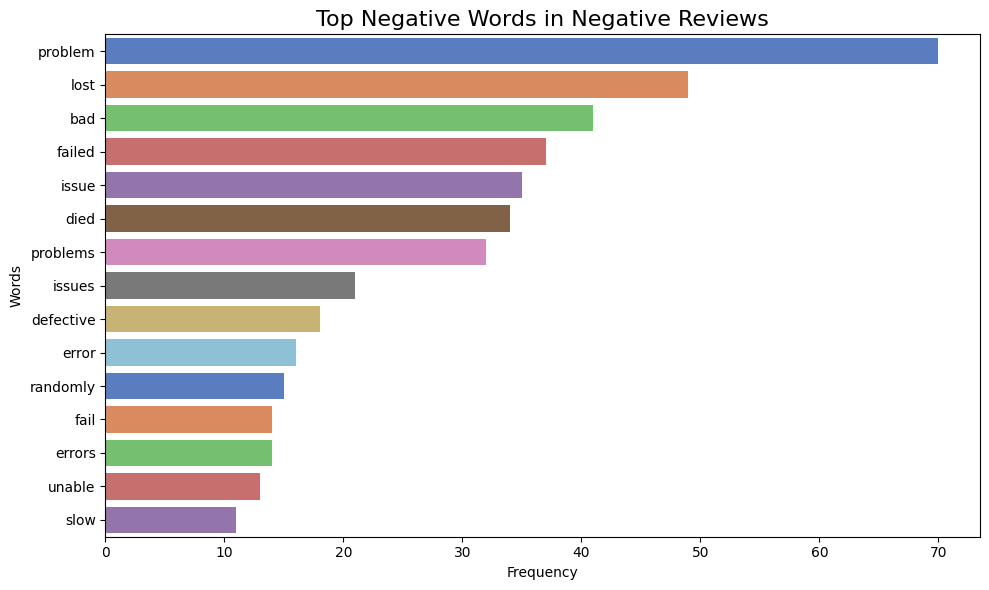

In [ ]:
from nltk.corpus import opinion_lexicon

nltk.download('opinion_lexicon')

# Load negative words from NLTK
negative_words = set(opinion_lexicon.negative())

# Function to filter only negative words
def get_negative_words(texts, top_n=15):
    words = ' '.join(texts).lower().split()
    words = [word.strip(string.punctuation) for word in words if word in negative_words]
    return Counter(words).most_common(top_n)

# Apply this only to negative reviews
sentiment_texts = df[df['sentiment'] == 'negative'][text_column].dropna().astype(str)
top_negative_words = get_negative_words(sentiment_texts)
plot_top_words(top_negative_words, "Top Negative Words in Negative Reviews")

In [ ]:
from nltk.corpus import opinion_lexicon
import string
from collections import Counter
import nltk

# Download opinion lexicon if not already downloaded
nltk.download('opinion_lexicon')

# Load positive words from NLTK
positive_words = set(opinion_lexicon.positive())

# Function to filter only positive words
def get_positive_words(texts, top_n=15):
    words = ' '.join(texts).lower().split()
    words = [word.strip(string.punctuation) for word in words if word in positive_words]
    return Counter(words).most_common(top_n)

# Apply this only to positive reviews
sentiment_texts = df[df['sentiment'] == 'positive'][text_column].dropna().astype(str)
top_positive_words = get_positive_words(sentiment_texts)

# Plot the results
plot_top_words(top_positive_words, "Top Positive Words in Positive Reviews")


[nltk_data] Downloading package opinion_lexicon to /root/nltk_data...
[nltk_data]   Package opinion_lexicon is already up-to-date!


KeyError: 'sentiment'

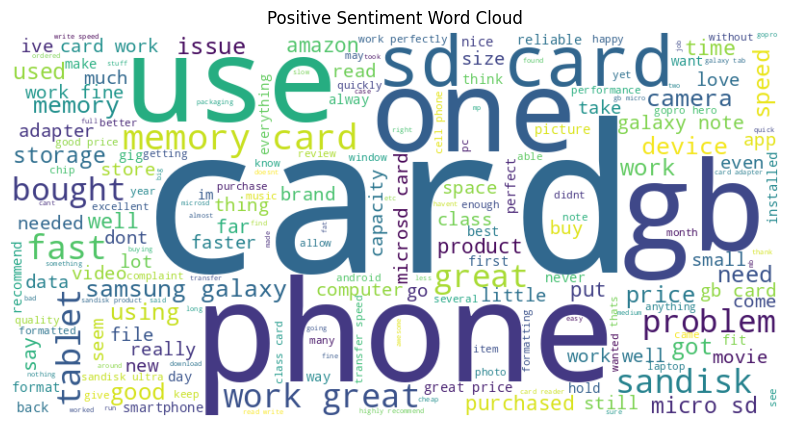

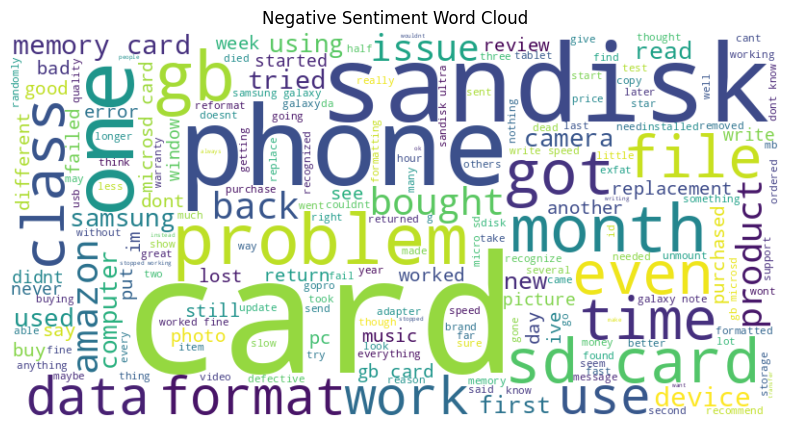

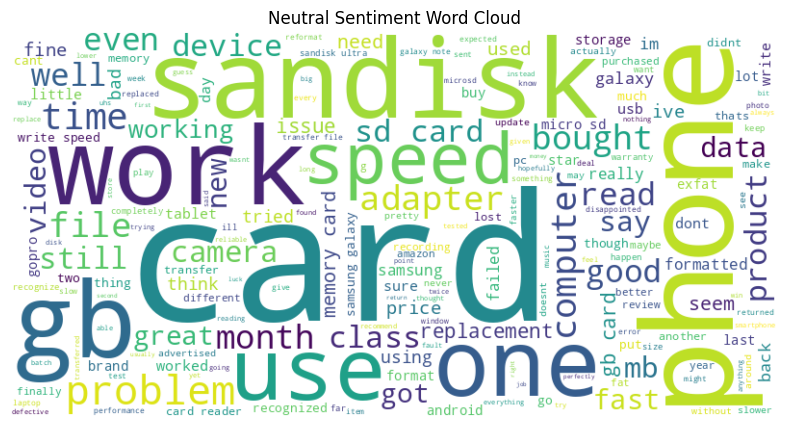

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

for sentiment in ['positive', 'negative', 'neutral']:
    text = ' '.join(df[df['sentiment'] == sentiment]['cleaned_text'])
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'{sentiment.capitalize()} Sentiment Word Cloud')
    plt.axis('off')
    plt.show()

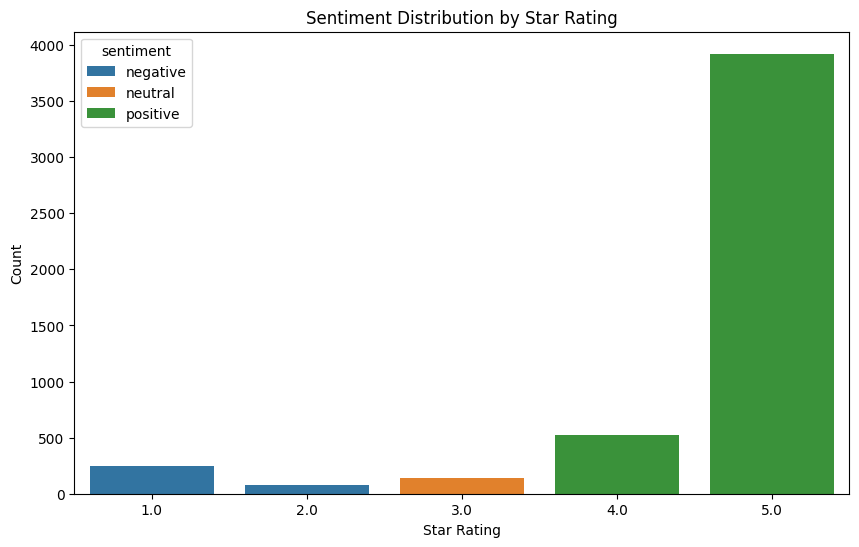

In [ ]:
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='overall', hue='sentiment')
plt.title('Sentiment Distribution by Star Rating')
plt.xlabel('Star Rating')
plt.ylabel('Count')
plt.show()

<ipython-input-41-3f46b069920d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['date'] = pd.to_datetime(df['unixReviewTime'], unit='s')
<ipython-input-41-3f46b069920d>:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_grouped = df.groupby([pd.Grouper(key='date', freq='M'), 'sentiment']).size().unstack().fillna(0)


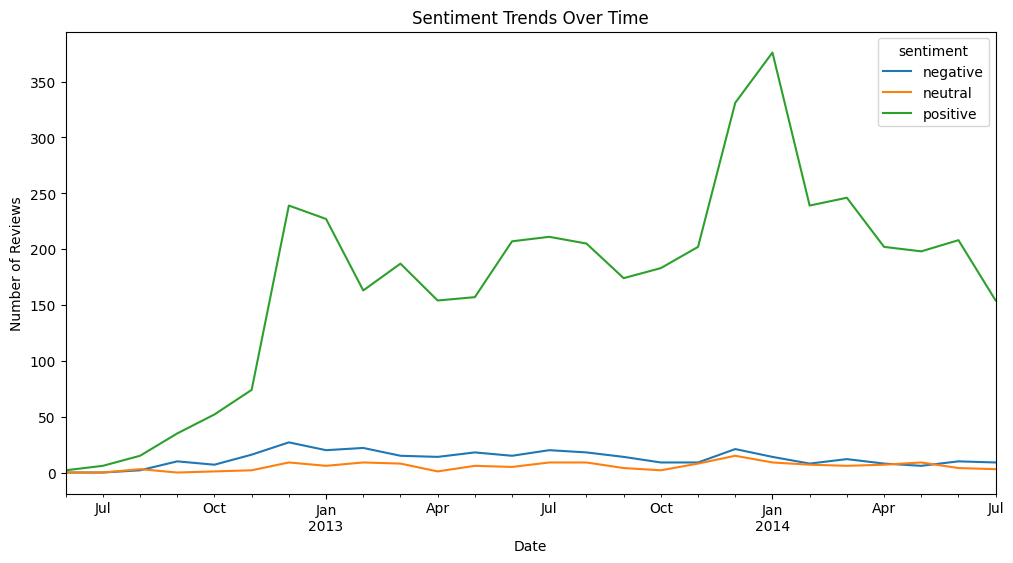

In [ ]:
df['date'] = pd.to_datetime(df['unixReviewTime'], unit='s')
df_grouped = df.groupby([pd.Grouper(key='date', freq='M'), 'sentiment']).size().unstack().fillna(0)
df_grouped.plot(figsize=(12, 6))
plt.title('Sentiment Trends Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Reviews')
plt.show()

<ipython-input-42-c95231bd437a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['helpfulness'] = df['helpful_yes'] / df['total_vote'].replace(0, 1)  # Avoid division by zero


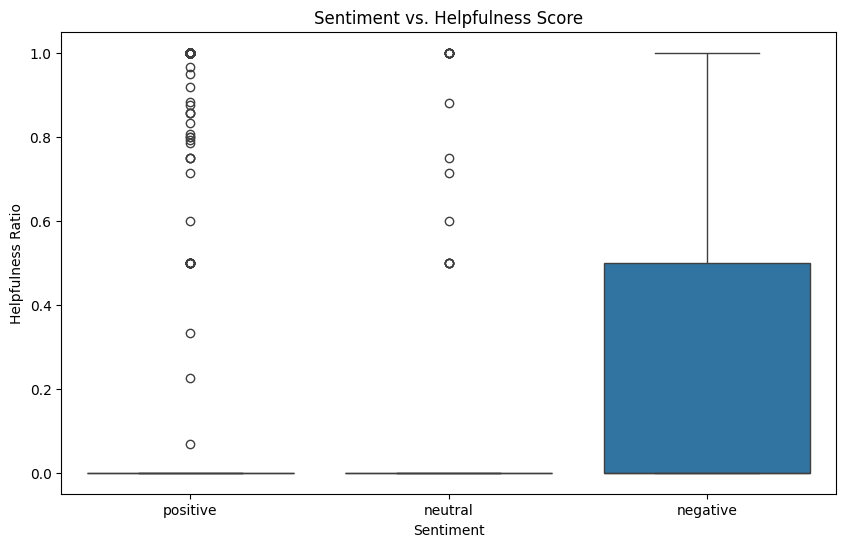

In [ ]:
df['helpfulness'] = df['helpful_yes'] / df['total_vote'].replace(0, 1)  # Avoid division by zero
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='sentiment', y='helpfulness')
plt.title('Sentiment vs. Helpfulness Score')
plt.xlabel('Sentiment')
plt.ylabel('Helpfulness Ratio')
plt.show()

<ipython-input-43-c4a364144749>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['category'] = df['asin'].apply(lambda x: 'Electronics' if x.startswith('B') else 'Other')


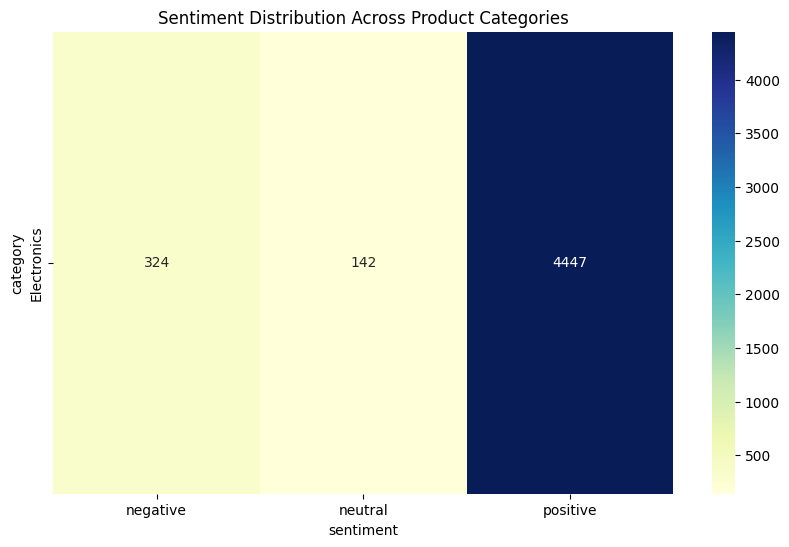

In [ ]:
# Mock category assignment (replace with actual mapping)
df['category'] = df['asin'].apply(lambda x: 'Electronics' if x.startswith('B') else 'Other')
pivot = df.pivot_table(index='category', columns='sentiment', aggfunc='size', fill_value=0)
plt.figure(figsize=(10, 6))
sns.heatmap(pivot, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Sentiment Distribution Across Product Categories')
plt.show()

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_recall_fscore_support
from sklearn.utils import resample
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
import re
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import nltk

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

# Load dataset

df['sentiment'] = df['overall'].apply(lambda x: 'positive' if x >= 4 else 'negative' if x <= 2 else 'neutral')

# Undersample positive class
df_positive = df[df['sentiment'] == 'positive']
df_negative = df[df['sentiment'] == 'negative']
df_neutral = df[df['sentiment'] == 'neutral']
min_size = min(len(df_neutral), len(df_negative), len(df_positive))
df_positive_under = resample(df_positive, replace=False, n_samples=min_size, random_state=42)
df_balanced = pd.concat([df_positive_under, df_negative, df_neutral])

# Preprocess
stop_words = set(stopwords.words('english')) - {'not', 'no', 'never'}
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    text = re.sub(r'<.*?>|[^a-zA-Z\s]', '', str(text).lower())
    tokens = word_tokenize(text)
    tokens = [lemmatizer.lemmatize(token) for token in tokens if token not in stop_words]
    return ' '.join(tokens)

df_balanced['cleaned_text'] = df_balanced['reviewText'].apply(preprocess_text)

# Split
X_train, X_test, y_train, y_test = train_test_split(df_balanced['cleaned_text'], df_balanced['sentiment'], test_size=0.2, random_state=42)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
<ipython-input-30-fcbc1c2436c9>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentiment'] = df['overall'].apply(lambda x: 'positive' if x >= 4 else 'negative' if x <= 2 else 'neutral')


In [24]:
import pandas as pd
import numpy as np
import re
import nltk
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_recall_fscore_support
from sklearn.utils import resample
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Download required NLTK data
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

# Load dataset
# Ensure you have your DataFrame `df` loaded beforehand
# Example: df = pd.read_csv("your_file.csv")

# Create sentiment column
df['sentiment'] = df['overall'].apply(lambda x: 'positive' if x >= 4 else 'negative' if x <= 2 else 'neutral')

# Balance the dataset via undersampling
df_positive = df[df['sentiment'] == 'positive']
df_negative = df[df['sentiment'] == 'negative']
df_neutral = df[df['sentiment'] == 'neutral']
min_size = min(len(df_neutral), len(df_negative), len(df_positive))
df_positive_under = resample(df_positive, replace=False, n_samples=min_size, random_state=42)
df_negative_under = resample(df_negative, replace=False, n_samples=min_size, random_state=42)
df_neutral_under = resample(df_neutral, replace=False, n_samples=min_size, random_state=42)
df_balanced = pd.concat([df_positive_under, df_negative_under, df_neutral_under])

# Text preprocessing
stop_words = set(stopwords.words('english')) - {'not', 'no', 'never'}
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    text = re.sub(r'<.*?>|[^a-zA-Z\s]', '', str(text).lower())
    tokens = word_tokenize(text)
    tokens = [lemmatizer.lemmatize(token) for token in tokens if token not in stop_words]
    return ' '.join(tokens)

df_balanced['cleaned_text'] = df_balanced['reviewText'].apply(preprocess_text)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(df_balanced['cleaned_text'], df_balanced['sentiment'], test_size=0.2, random_state=42)

# TF-IDF vectorization
vectorizer = TfidfVectorizer(max_features=10000, ngram_range=(1, 3))
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Logistic Regression model
lr_model = LogisticRegression(max_iter=1000, class_weight='balanced', C=0.5)
lr_model.fit(X_train_tfidf, y_train)
lr_preds = lr_model.predict(X_test_tfidf)

# Evaluation function
def evaluate_model(y_true, y_pred, model_name):
    accuracy = accuracy_score(y_true, y_pred)
    precision, recall, f1, _ = precision_recall_fscore_support(y_true, y_pred, average=None, labels=['positive', 'neutral', 'negative'])
    print(f"\n{model_name} Results:")
    print(f"Accuracy: {accuracy:.4f}")
    for label, p, r, f in zip(['positive', 'neutral', 'negative'], precision, recall, f1):
        print(f"{label} - Precision: {p:.4f}, Recall: {r:.4f}, F1: {f:.4f}")

# Evaluate Logistic Regression
evaluate_model(y_test, lr_preds, "Logistic Regression")

# Sample predictions
samples = ["This product is amazing, I love it!",
           "Terrible experience, never buying again.",
           "It's okay, nothing special.",
           "Not good at all, very disappointing."]

samples_cleaned = [preprocess_text(text) for text in samples]
samples_tfidf = vectorizer.transform(samples_cleaned)
lr_sample_preds = lr_model.predict(samples_tfidf)

print("\nSample Predictions:")
for text, pred in zip(samples, lr_sample_preds):
    print(f"Review: \"{text}\" | Predicted Sentiment: {pred}")


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
<ipython-input-24-31fdbaf4aa73>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentiment'] = df['overall'].apply(lambda x: 'positive' if x >= 4 else 'negative' if x <= 2 else 'neutral')



Logistic Regression Results:
Accuracy: 0.6860
positive - Precision: 0.9032, Recall: 0.8000, F1: 0.8485
neutral - Precision: 0.5625, Recall: 0.3750, F1: 0.4500
negative - Precision: 0.5641, Recall: 0.8148, F1: 0.6667

Sample Predictions:
Review: "This product is amazing, I love it!" | Predicted Sentiment: positive
Review: "Terrible experience, never buying again." | Predicted Sentiment: negative
Review: "It's okay, nothing special." | Predicted Sentiment: positive
Review: "Not good at all, very disappointing." | Predicted Sentiment: neutral


In [23]:
# Undersample positive class
from sklearn.utils import resample
df_positive = df[df['sentiment'] == 'positive']
df_negative = df[df['sentiment'] == 'negative']
df_neutral = df[df['sentiment'] == 'neutral']
min_size = min(len(df_neutral), len(df_negative), len(df_positive))
df_positive_under = resample(df_positive, replace=False, n_samples=min_size, random_state=42)
df_balanced = pd.concat([df_positive_under, df_negative, df_neutral])


# Vectorize with more features
from sklearn.metrics import accuracy_score, precision_recall_fscore_support
vectorizer = TfidfVectorizer(max_features=10000, ngram_range=(1, 3))  # Trigrams for context
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Logistic Regression with stronger regularization
lr_model = LogisticRegression(max_iter=1000, class_weight='balanced', C=0.5)  # Lower C for regularization
lr_model.fit(X_train_tfidf, y_train)
lr_preds = lr_model.predict(X_test_tfidf)

# Evaluation
def evaluate_model(y_true, y_pred, model_name):
    accuracy = accuracy_score(y_true, y_pred)
    precision, recall, f1, _ = precision_recall_fscore_support(y_true, y_pred, average=None, labels=['positive', 'neutral', 'negative'])
    print(f"\n{model_name} Results:")
    print(f"Accuracy: {accuracy:.4f}")
    for label, p, r, f in zip(['positive', 'neutral', 'negative'], precision, recall, f1):
        print(f"{label} - Precision: {p:.4f}, Recall: {r:.4f}, F1: {f:.4f}")

evaluate_model(y_test, lr_preds, "Logistic Regression")

# Test samples
samples = ["This product is amazing, I love it!", "Terrible experience, never buying again.",
           "It's okay, nothing special.", "Not good at all, very disappointing."]
samples_cleaned = [preprocess_text(text) for text in samples]
samples_tfidf = vectorizer.transform(samples_cleaned)
lr_sample_preds = lr_model.predict(samples_tfidf)
for text, pred in zip(samples, lr_sample_preds):
    print(f"\nReview: {text} | Logistic Regression: {pred}")


Logistic Regression Results:
Accuracy: 0.8932
positive - Precision: 0.9704, Recall: 0.9225, F1: 0.9459
neutral - Precision: 0.0741, Recall: 0.0800, F1: 0.0769
negative - Precision: 0.5000, Recall: 0.8088, F1: 0.6180

Review: This product is amazing, I love it! | Logistic Regression: positive

Review: Terrible experience, never buying again. | Logistic Regression: positive

Review: It's okay, nothing special. | Logistic Regression: positive

Review: Not good at all, very disappointing. | Logistic Regression: positive


In [28]:
import pickle
with open('logistic_model.pkl', 'wb') as file:
    pickle.dump(lr_model, file)

In [29]:
with open("naivebayes.pkl", "wb") as vectorizer_file:
    pickle.dump(nb_model, vectorizer_file)

In [25]:
from sklearn.naive_bayes import ComplementNB

# Train ComplementNB
nb_model = ComplementNB()
nb_model.fit(X_train_tfidf, y_train)
nb_preds = nb_model.predict(X_test_tfidf)

evaluate_model(y_test, nb_preds, "Complement Naive Bayes")

# Test samples
nb_sample_preds = nb_model.predict(samples_tfidf)
for text, pred in zip(samples, nb_sample_preds):
    print(f"\nReview: {text} | Naive Bayes: {pred}")


Complement Naive Bayes Results:
Accuracy: 0.6163
positive - Precision: 0.8214, Recall: 0.6571, F1: 0.7302
neutral - Precision: 0.4667, Recall: 0.2917, F1: 0.3590
negative - Precision: 0.5349, Recall: 0.8519, F1: 0.6571

Review: This product is amazing, I love it! | Naive Bayes: positive

Review: Terrible experience, never buying again. | Naive Bayes: negative

Review: It's okay, nothing special. | Naive Bayes: negative

Review: Not good at all, very disappointing. | Naive Bayes: negative
